
<img src="https://static.wixstatic.com/media/8cb7ea_82957ac107aa4d07a51d503520820f21~mv2.png/v1/fill/w_500,h_438,al_c/8cb7ea_82957ac107aa4d07a51d503520820f21~mv2.png" alt="Tech4Animals Logo" width="250">

[Tech4Animals](https://www.tech4animals.org/)
---



# Animal Facial Landmarks API Documentation



## Overview







This guide provides instructions on how to send an image to our animal facial landmark detector. The service will return the landmarks facial landmarks of animals. The image should be in Base64 format, and the request is made using a JSON payload. Currently the animal facial landmark detector supports cats and dogs (dogs model is still being enhanced and will be updated very soon).

This notebook will explain the needed steps and demonstrate them on an example image.

You can read more about the project in the following paper: https://link.springer.com/article/10.1007/s11263-024-02006-w



## Prerequisites

- `base64`
- `json`
- `requests` OR `curl`

Ensure curl is installed on your system. curl is typically pre-installed on macOS and Linux. On Windows, you might need to install it or use a tool like Git Bash which includes curl.

In [1]:
import base64
import requests
import json

## Steps

### 1. Convert the Image to Base64

The `convert_image_to_base64` function reads the image file in binary mode and encodes its content to a Base64 string.

In [2]:
def convert_image_to_base64(image_path):
  with open(image_path, "rb") as image_file:
    base64_string = base64.b64encode(image_file.read()).decode('utf-8')
  return base64_string

### 2. Create the JSON Payload

The `create_json_payload` function constructs a JSON object with the name field set to the image's filename and the image field set to the Base64-encoded string prefixed with data:image/jpeg;base64,.

In [3]:
def create_json_payload(image_path, image_base64_string):
  payload = {
    "name": image_path.split("/")[-1],  # Extract the filename from the path
    "image": f"data:image/jpeg;base64,{image_base64_string}"
  }
  return json.dumps(payload)

### 3. Send the HTTP POST Request:

The `send_image_for_processing` function sends the JSON payload to the specified URL using an HTTP POST request. It includes appropriate headers and handles the response.

In [4]:
def send_image_for_processing(image_path, url):
  image_base64_string = convert_image_to_base64(image_path)
  request = create_json_payload(image_path, image_base64_string)

  headers = {'Content-Type': 'application/json'}

  response = requests.post(url, data=request, headers=headers)

  if response.status_code == 200:
    print("Image processed successfully!")
    print("Response:", response.json())
    return response.json()
  else:
    print("Failed to process image")

Alternatively, you could can send the request using `curl` from your Command Link / Terminal given the request is ready and saved as `request.json`, using the following command:


```
curl -X POST http://34.165.25.79:6000/landmarks \
     -H "Content-Type: application/json" \
     -d @request.json

```



### Usage Example

Get cat image using a link.

In [5]:
#@title get cat image

cat_url = "https://i.natgeofe.com/n/548467d8-c5f1-4551-9f58-6817a8d2c45e/NationalGeographic_2572187_square.jpg" # @param {type:"string"}

# Send a GET request to the URL
response = requests.get(cat_url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
  # Open a file in binary write mode and save the image content
  with open("image.jpg", "wb") as f:
    f.write(response.content)
  print("Cat image downloaded successfully!")
else:
  print("Failed to download the cat image.")

Cat image downloaded successfully!


In [6]:
url = "http://34.165.60.2:6000/landmarks"
image_path = r"C:\Users\Wanlipa\Desktop\Deep Learing\project\cat-facial-expression-recognition\image.jpg"


# Send the image for processing
result = send_image_for_processing(image_path, url)



Image processed successfully!
Response: [{'cat': {'bbox': {'pul': {'x': 493, 'y': 79}, 'pbr': {'x': 2360, 'y': 2235}, 'label': 'cat', 'score': 0.9196797013282776}, 'landmarks': [{'x': 1914, 'y': 2000, 'label': 'part0', 'score': '1.00'}, {'x': 1987, 'y': 1462, 'label': 'part1', 'score': '1.00'}, {'x': 1909, 'y': 2055, 'label': 'part2', 'score': '1.00'}, {'x': 1431, 'y': 1614, 'label': 'part3', 'score': '1.00'}, {'x': 1266, 'y': 1532, 'label': 'part4', 'score': '1.00'}, {'x': 1565, 'y': 1565, 'label': 'part5', 'score': '1.00'}, {'x': 1384, 'y': 1408, 'label': 'part6', 'score': '1.00'}, {'x': 1442, 'y': 1663, 'label': 'part7', 'score': '1.00'}, {'x': 2058, 'y': 1285, 'label': 'part8', 'score': '1.00'}, {'x': 1910, 'y': 1468, 'label': 'part9', 'score': '1.00'}, {'x': 1930, 'y': 1278, 'label': 'part10', 'score': '1.00'}, {'x': 2012, 'y': 1511, 'label': 'part11', 'score': '1.00'}, {'x': 1837, 'y': 1818, 'label': 'part12', 'score': '1.00'}, {'x': 1941, 'y': 1775, 'label': 'part13', 'score': '

#### Print the image with the landmarks

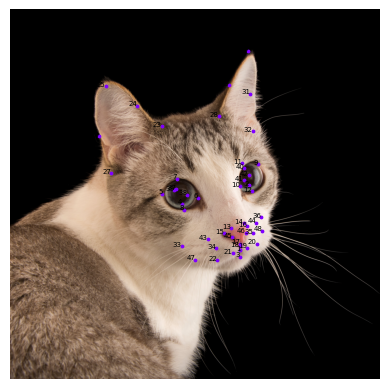

In [7]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import matplotlib.cm as cm
import numpy as np

# Define the image path and result (example placeholders)

# Open the image
image = Image.open(image_path)

# Create a figure and axis
fig, ax = plt.subplots()

# Display the image
ax.imshow(image)

# Define the number of distinct animals
num_animals = len(result)
cmap = plt.colormaps['rainbow']

# Iterate over the result to plot landmarks with different colors
for i, animal_data in enumerate(result):
    for animal, details in animal_data.items():
        color = cmap(i / num_animals)  # Get a color from the colormap
        landmarks = details['landmarks']
        
        # Extract x and y coordinates
        x_coords = [landmark['x'] for landmark in landmarks]
        y_coords = [landmark['y'] for landmark in landmarks]
        
        # Plot each landmark and annotate with index
        for j, (x, y) in enumerate(zip(x_coords, y_coords)):
            ax.scatter(x, y, color=color, s=3)
            ax.text(x, y, str(j+1), fontsize=5, ha='right')



# Turn off the axis
plt.axis('off')

# Show the plot
plt.show()


In [8]:
response = requests.post(url, data=create_json_payload(image_path, convert_image_to_base64(image_path))
                         , headers={'Content-Type': 'application/json'})

In [9]:
print(response.json())

[{'cat': {'bbox': {'pul': {'x': 493, 'y': 79}, 'pbr': {'x': 2360, 'y': 2235}, 'label': 'cat', 'score': 0.9196797013282776}, 'landmarks': [{'x': 1914, 'y': 2000, 'label': 'part0', 'score': '1.00'}, {'x': 1987, 'y': 1462, 'label': 'part1', 'score': '1.00'}, {'x': 1909, 'y': 2055, 'label': 'part2', 'score': '1.00'}, {'x': 1431, 'y': 1614, 'label': 'part3', 'score': '1.00'}, {'x': 1266, 'y': 1532, 'label': 'part4', 'score': '1.00'}, {'x': 1565, 'y': 1565, 'label': 'part5', 'score': '1.00'}, {'x': 1384, 'y': 1408, 'label': 'part6', 'score': '1.00'}, {'x': 1442, 'y': 1663, 'label': 'part7', 'score': '1.00'}, {'x': 2058, 'y': 1285, 'label': 'part8', 'score': '1.00'}, {'x': 1910, 'y': 1468, 'label': 'part9', 'score': '1.00'}, {'x': 1930, 'y': 1278, 'label': 'part10', 'score': '1.00'}, {'x': 2012, 'y': 1511, 'label': 'part11', 'score': '1.00'}, {'x': 1837, 'y': 1818, 'label': 'part12', 'score': '1.00'}, {'x': 1941, 'y': 1775, 'label': 'part13', 'score': '1.00'}, {'x': 1775, 'y': 1861, 'label': 

In [10]:
response = requests.post(url, data=create_json_payload(image_path, convert_image_to_base64(image_path))
                         , headers={'Content-Type': 'application/json'})
landmarks = response.json()[0]['cat']['landmarks']
import pandas as pd
# Create a DataFrame
df = pd.DataFrame(landmarks)

# # Display the DataFrame
print(df)
df.to_csv('out.csv', index=False)  

       x     y   label score
0   1914  2000   part0  1.00
1   1987  1462   part1  1.00
2   1909  2055   part2  1.00
3   1431  1614   part3  1.00
4   1266  1532   part4  1.00
5   1565  1565   part5  1.00
6   1384  1408   part6  1.00
7   1442  1663   part7  1.00
8   2058  1285   part8  1.00
9   1910  1468   part9  1.00
10  1930  1278  part10  1.00
11  2012  1511  part11  1.00
12  1837  1818  part12  1.00
13  1941  1775  part13  1.00
14  1775  1861  part14  1.00
15  1972  1799  part15  1.00
16  1910  1948  part16  1.00
17  1908  1967  part17  1.00
18  1968  1979  part18  1.00
19  2050  1947  part19  1.00
20  1851  2025  part20  1.00
21  1723  2082  part21  1.00
22  1261   972  part22  1.00
23  1059   800  part23  1.00
24   794   637  part24  1.00
25   743  1055  part25  1.00
26   843  1361  part26  1.00
27  1733   888  part27  1.00
28  1823   632  part28  1.00
29  1980   348  part29  1.00
30  1996   701  part30  1.00
31  2016  1014  part31  1.00
32  1427  1967  part32  1.00
33  1714  1986

# USE CODE

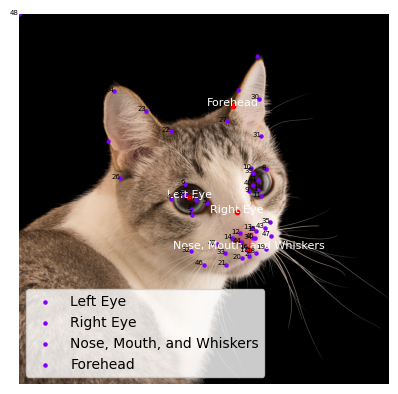

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import matplotlib.cm as cm
import numpy as np

# Define the regions and their landmarks
regions = {
    'Left Eye': [4, 5, 6, 7, 8, 37, 38, 39],
    'Right Eye': [2, 9, 10, 11, 12, 40, 41, 42],
    'Nose, Mouth, and Whiskers': [1, 3, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 33, 34, 35, 36, 43, 44, 45, 46, 47, 48],
    'Forehead': [23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
}

# Function to calculate the median point
def median_point(landmarks, indices):
    x_coords = [landmarks[i]['x'] for i in indices]  # Indices are 0-based
    y_coords = [landmarks[i]['y'] for i in indices]
    return np.median(x_coords), np.median(y_coords)

url = "http://34.165.60.2:6000/landmarks"
image_path = r"C:\Users\Wanlipa\Desktop\Deep Learing\project\cat-facial-expression-recognition\image.jpg"


result = [{
    'cat1': {
        'landmarks': [
            {'x': 1914, 'y': 2000}, {'x': 1987, 'y': 1462}, {'x': 1909, 'y': 2005},{'x': 1431, 'y': 1614},{'x': 1266, 'y': 1532},{'x': 1565, 'y': 1565},
            {'x': 1384, 'y': 1408},{'x': 1442, 'y': 1663},{'x': 2058, 'y': 1285},{'x': 1910, 'y': 1468},{'x': 1930, 'y': 1278},{'x': 2012, 'y': 1511},
            {'x': 1837, 'y': 1818},{'x': 1941, 'y': 1775},{'x': 1775, 'y': 1861},{'x': 1972, 'y': 1799},{'x': 1910, 'y': 1948},{'x': 1908, 'y': 1967},
            {'x': 1968, 'y': 1979}, {'x': 2050, 'y': 1947}, {'x': 1851, 'y': 2025},{'x': 1723, 'y': 2082},{'x': 1261, 'y': 972},{'x': 1059, 'y': 800},
            {'x': 794, 'y': 637},{'x': 743, 'y': 1055},{'x': 843, 'y': 1361},{'x': 1733, 'y': 888},{'x': 1823, 'y': 632},{'x': 1980, 'y': 348},
            {'x': 1996, 'y': 701},{'x': 2016, 'y': 1014},{'x': 1427, 'y': 1967},{'x': 1714, 'y': 1986},{'x': 1944, 'y': 1861},{'x': 2086, 'y': 1725},
            {'x': 1383, 'y': 1496}, {'x': 1472, 'y': 1539}, {'x': 1364, 'y': 1502},{'x': 1948, 'y': 1317},{'x': 1944, 'y': 1417},{'x': 1984, 'y': 1376},
            {'x': 1643, 'y': 1912},{'x': 2046, 'y': 1772},{'x': 1846, 'y': 1894},{'x': 1959, 'y': 1854},{'x': 1539, 'y': 2080},{'x': 2096, 'y': 1838}  # Continue for all required landmarks
            # Make sure to fill in all landmarks up to the highest index required (48 in this case)
        ]
    }
}]

# Ensure we have enough landmarks for the example
for cat_data in result:
    for key in cat_data:
        while len(cat_data[key]['landmarks']) < 49:
            cat_data[key]['landmarks'].append({'x': 0, 'y': 0})  # Add dummy points if necessary

# Open the image
image = Image.open(image_path)

# Create a figure and axis
fig, ax = plt.subplots()

# Display the image
ax.imshow(image)

# Define the number of distinct animals
num_animals = len(result)
cmap = plt.colormaps['rainbow']

# Iterate over the result to plot landmarks with different colors
for i, animal_data in enumerate(result):
    for animal, details in animal_data.items():
        color = cmap(i / num_animals)  # Get a color from the colormap
        landmarks = details['landmarks']
        
        # Plot each landmark
        for region, indices in regions.items():
            x_coords = [landmarks[j]['x'] for j in indices if j < len(landmarks)]  # Indices are 0-based
            y_coords = [landmarks[j]['y'] for j in indices if j < len(landmarks)]
            
            # Scatter plot for the landmarks
            ax.scatter(x_coords, y_coords, color=color, s=5, label=region)
            
            # Plot central point
            if region == 'Left Eye':
                central_x, central_y = median_point(landmarks, [37, 38])
            elif region == 'Right Eye':
                central_x, central_y = median_point(landmarks, [41, 42])
            elif region == 'Nose, Mouth, and Whiskers':
                central_x, central_y = landmarks[16]['x'], landmarks[16]['y']
            elif region == 'Forehead':
                central_x, central_y = median_point(landmarks, [27, 28])
            
            # Scatter plot for the central point
            ax.scatter(central_x, central_y, color='red', s=10)
            ax.text(central_x, central_y, region, fontsize=8, ha='center', color='white')
            
            for j, (x, y) in enumerate(zip(x_coords, y_coords)):
                ax.text(x, y, str(indices[j]), fontsize=5, ha='right')

# Turn off the axis
plt.axis('off')

# Show the plot
plt.legend()
plt.show()
